<a href="https://colab.research.google.com/github/DrewFinley/IMSE-441/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/IMSE 441/Lab_2.csv', sep=',', na_values=".", encoding='cp1252')
df 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Cement,Water,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,540.0,162,1040.0,676.0,28,79.986111
1,540.0,162,1055.0,676.0,28,61.887366
2,332.5,228,932.0,594.0,270,40.269535
3,332.5,228,932.0,594.0,365,41.052780
4,198.6,192,978.4,825.5,360,44.296075
5,266.0,228,932.0,670.0,90,47.029847
6,380.0,228,932.0,594.0,365,43.698299
7,380.0,228,932.0,594.0,28,36.447770
8,266.0,228,932.0,670.0,28,45.854291
9,475.0,228,932.0,594.0,28,39.289790


# Question 1

In [3]:
df.describe()

,Cement,Water,Coarse_Aggregate,Fine_Aggregate,Age,Strength
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,323.257500,217.500000,953.915000,665.340000,165.625000,43.463136
std,116.620498,19.394686,42.090912,83.950354,131.012563,11.065465
min,139.600000,162.000000,932.000000,594.000000,3.000000,8.063422
25%,227.775000,219.000000,932.000000,594.000000,28.000000,38.554808
50%,332.500000,228.000000,932.000000,670.000000,135.000000,42.180073
75%,391.875000,228.000000,943.600000,671.500000,270.000000,48.891433
max,540.000000,228.000000,1055.000000,825.500000,365.000000,79.986111


In [4]:
x=df['Cement'].mean()
y=df['Cement'].median()
z=df['Cement'].mode()
x2=df['Fine_Aggregate'].mean()
y2=df['Fine_Aggregate'].median()
z2=df['Fine_Aggregate'].mode()
x3=df['Strength'].mean()
y3=df['Strength'].median()
z3=df['Strength'].mode()

print('Mean Cement= ',x,'Median Cement= ',y, 'Mode Cement= ',z)
print('Mean Fine Aggregate= ',x2,'Median Fine Aggregate= ',y2, 'Mode Fine Aggregate= ',z2)
print('Mean Strength= ',x3,'Median Strength= ',y3, 'Mode Strength= ',z3)

Mean Cement=  323.2575 Median Cement=  332.5 Mode Cement=  0    380.0
dtype: float64
Mean Fine Aggregate=  665.3399999999999 Median Fine Aggregate=  670.0 Mode Fine Aggregate=  0    594.0
dtype: float64
Mean Strength=  43.463136377249995 Median Strength=  42.180073254999996 Mode Strength=  0    52.90832
dtype: float64


# Question 2

In [13]:
range_cement = max(df['Cement'] - min(df['Cement']))
quartiles = df.Cement.quantile([0.25,0.5,0.75])
x = df['Cement'].var()
std = math.sqrt(x)
print('Range: ', range_cement)
print('Quartiles: ', quartiles, 'Variance: ', x, 'Standard Deviation: ', std)

Range:  400.4
Quartiles:  0.25    227.775
0.50    332.500
0.75    391.875
Name: Cement, dtype: float64 Variance:  13600.340455128206 Standard Deviation:  116.62049757709065


In [14]:
range_agg = max(df['Coarse_Aggregate'] - min(df['Coarse_Aggregate']))
quartiles = df.Coarse_Aggregate.quantile([0.25,0.5,0.75])
x = df['Coarse_Aggregate'].var()
std = math.sqrt(x)
print('Range: ', range_agg)
print('Quartiles: ', quartiles, 'Variance: ', x, 'Standard Deviation: ', std)

Range:  123.0
Quartiles:  0.25    932.0
0.50    932.0
0.75    943.6
Name: Coarse_Aggregate, dtype: float64 Variance:  1771.644897435897 Standard Deviation:  42.09091229037329


In [15]:
range_agg = max(df['Fine_Aggregate'] - min(df['Fine_Aggregate']))
quartiles = df.Fine_Aggregate.quantile([0.25,0.5,0.75])
x = df['Fine_Aggregate'].var()
std = math.sqrt(x)
print('Range: ', range_agg)
print('Quartiles: ', quartiles, 'Variance: ', x, 'Standard Deviation: ', std)

Range:  231.5
Quartiles:  0.25    594.0
0.50    670.0
0.75    671.5
Name: Fine_Aggregate, dtype: float64 Variance:  7047.661948717949 Standard Deviation:  83.95035407142693


In [17]:
range_strength = max(df['Strength'] - min(df['Strength']))
quartiles = df.Strength.quantile([0.25,0.5,0.75])
x = df['Strength'].var()
std = math.sqrt(x)
print('Range: ', range_strength)
print('Quartiles: ', quartiles, 'Variance: ', x, 'Standard Deviation: ', std)

Range:  71.92268894
Quartiles:  0.25    38.554808
0.50    42.180073
0.75    48.891433
Name: Strength, dtype: float64 Variance:  122.44451823782761 Standard Deviation:  11.065465116199482


# Question 3


In [18]:
!pip install stemgraphic
import stemgraphic as STM

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


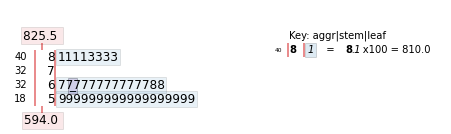

In [58]:
Fig, ax=STM.stem_graphic(df['Fine_Aggregate'],scale=100)

Text(0, 0.5, 'Aggregate')

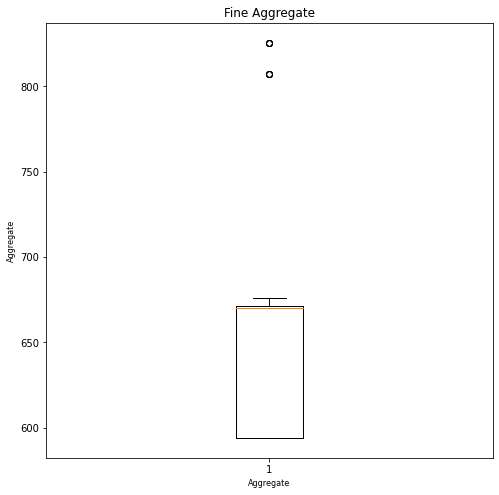

In [56]:
plt.figure(figsize = (8,8))
plt.boxplot(df['Fine_Aggregate'])
plt.title('Fine Aggregate', fontsize = 12)
plt.xlabel('Aggregate', fontsize = 8)
plt.ylabel("Aggregate", fontsize = 8)


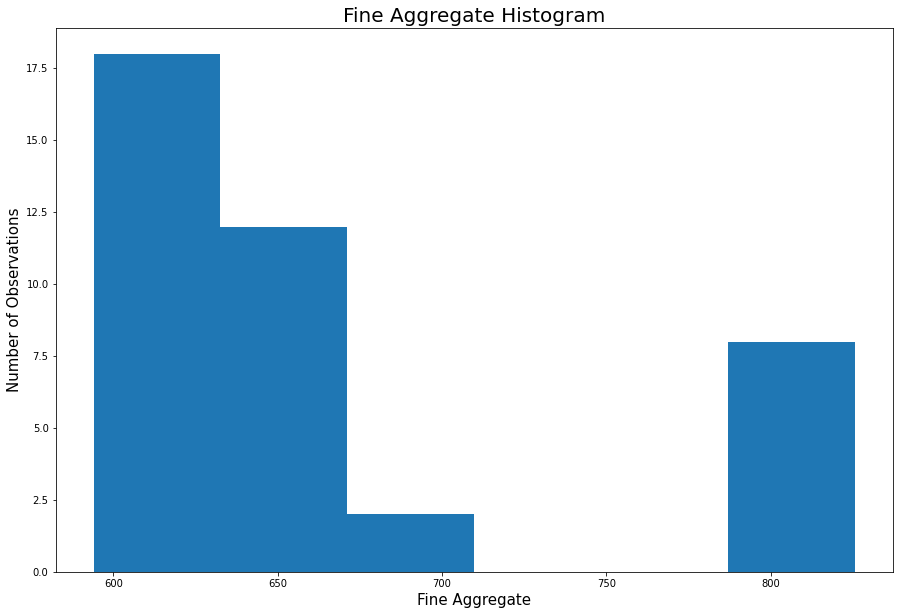

In [51]:
plt.figure(figsize = (15,10))
plt.hist(df['Fine_Aggregate'], bins =6)
plt.xlabel('Fine Aggregate', fontsize = 15)
plt.ylabel('Number of Observations', fontsize = 15)
plt.title('Fine Aggregate Histogram', fontsize = 20)
plt.show()

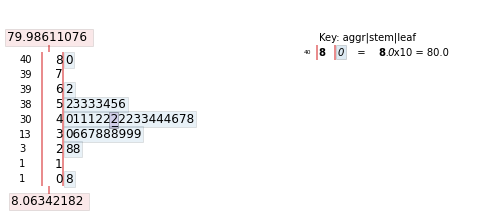

In [12]:
Fig, ax=STM.stem_graphic(df['Strength'],scale=10)

Text(0, 0.5, 'Concrete Strength in psi')

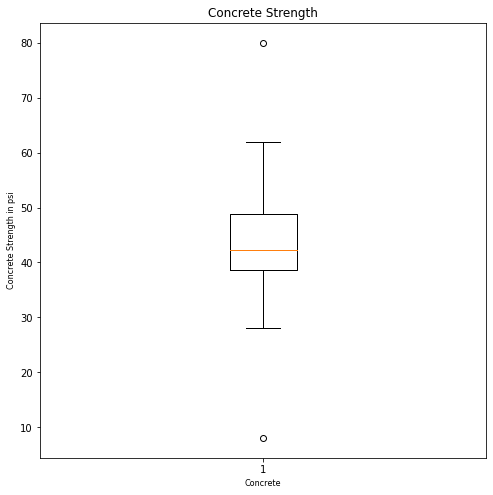

In [59]:
plt.figure(figsize = (8,8))
plt.boxplot(df['Strength'])
plt.title('Concrete Strength', fontsize = 12)
plt.xlabel('Concrete', fontsize = 8)
plt.ylabel("Concrete Strength in psi", fontsize = 8)


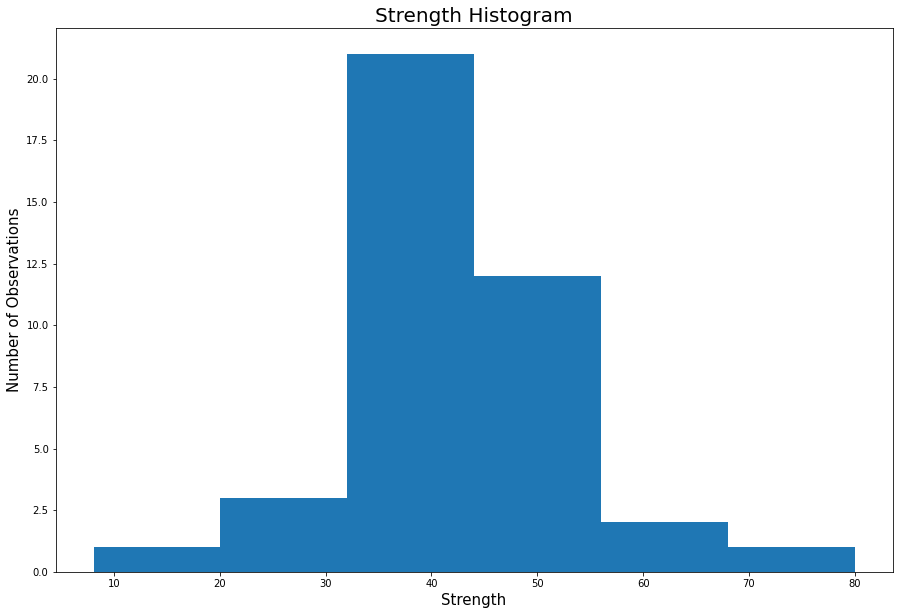

In [52]:
plt.figure(figsize = (15,10))
plt.hist(df['Strength'], bins =6)
plt.xlabel('Strength', fontsize = 15)
plt.ylabel('Number of Observations', fontsize = 15)
plt.title('Strength Histogram', fontsize = 20)
plt.show()

# Question 4

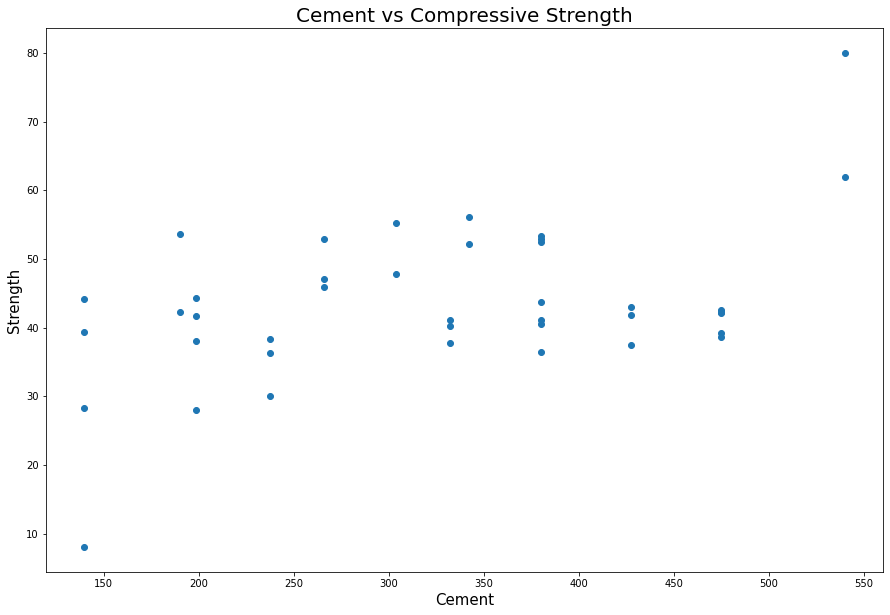

In [28]:
plt.figure(figsize=(15,10))
plt.scatter(df['Cement'],df['Strength'])
plt.title('Cement vs Compressive Strength', fontsize= 20 )
plt.xlabel('Cement', fontsize = 15)
plt.ylabel('Strength', fontsize =15)
plt.show()
     

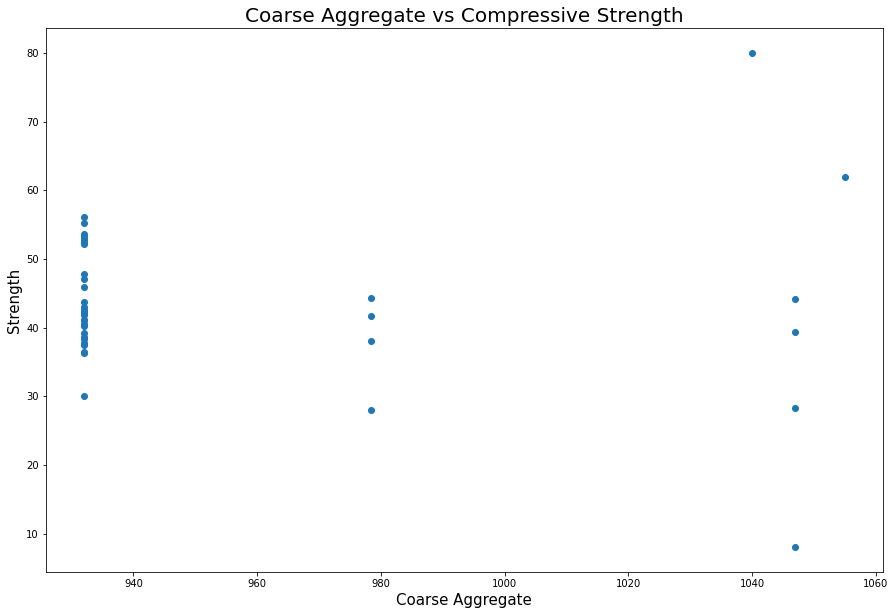

In [29]:
plt.figure(figsize=(15,10))
plt.scatter(df['Coarse_Aggregate'],df['Strength'])
plt.title('Coarse Aggregate vs Compressive Strength', fontsize= 20 )
plt.xlabel('Coarse Aggregate', fontsize = 15)
plt.ylabel('Strength', fontsize =15)
plt.show()
     

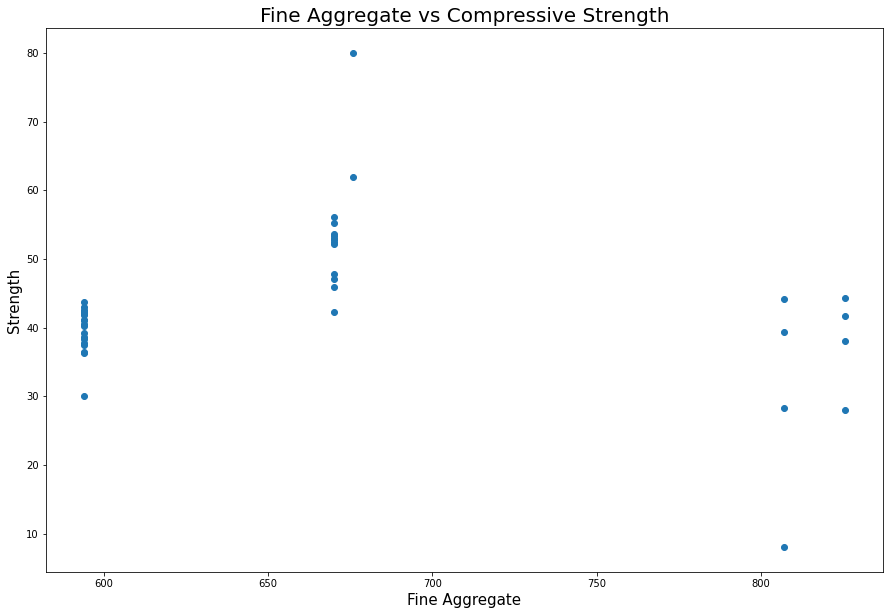

In [30]:
plt.figure(figsize=(15,10))
plt.scatter(df['Fine_Aggregate'],df['Strength'])
plt.title('Fine Aggregate vs Compressive Strength', fontsize= 20 )
plt.xlabel('Fine Aggregate', fontsize = 15)
plt.ylabel('Strength', fontsize =15)
plt.show()
     

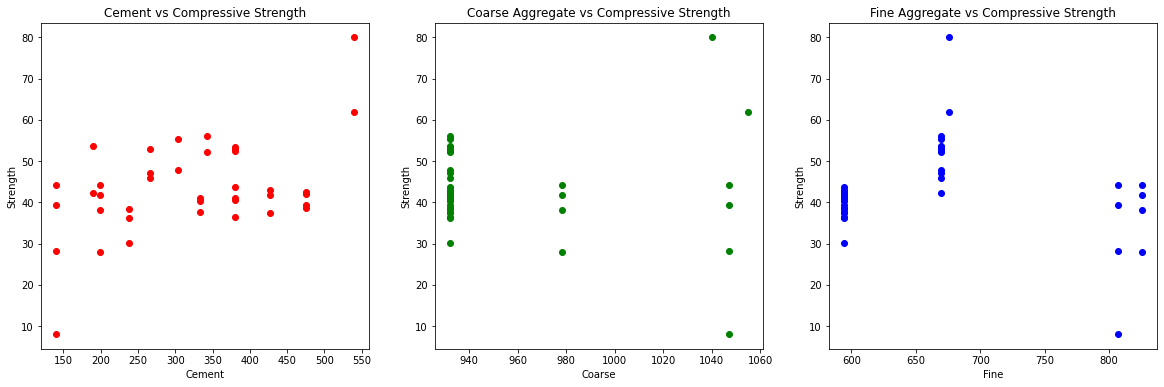

In [35]:

fig, ((ax1, ax2,ax3)) = plt.subplots(nrows=1,ncols=3,figsize=(20,6))
ax1.plot()
ax2.plot()
ax3.plot()
ax1.scatter(df['Cement'],df['Strength'],color='r')
ax1.set(title='Cement vs Compressive Strength',xlabel='Cement',ylabel='Strength')
ax2.scatter(df['Coarse_Aggregate'],df['Strength'],color='g')
ax2.set(title='Coarse Aggregate vs Compressive Strength',xlabel='Coarse',ylabel='Strength')
ax3.scatter(df['Fine_Aggregate'],df['Strength'],color='b')
ax3.set(title='Fine Aggregate vs Compressive Strength',xlabel='Fine',ylabel='Strength')
plt.show()